In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
import matplotlib.pyplot as plt
import joblib

In [2]:
def load_data_from_gsheet(sheet_id):
    xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
    df = pd.read_excel(xls)
    df['TIME'] = pd.to_datetime(df['TIME']) 
    return df

Enter the latitude: 26.8375
Enter the longitude: 77.49027778
Enter the future year to forecast up to (e.g., 2028): 2032

🗓 Forecasting from 2017-01 to 2032-12 (191 months)...



D:\Users\Lenovo\AppData\Local\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.3728
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.3533
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.3345
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3163
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2986
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.2814
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2645
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2476
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2308
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2141
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1975
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1810
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1647
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1486
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1327
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

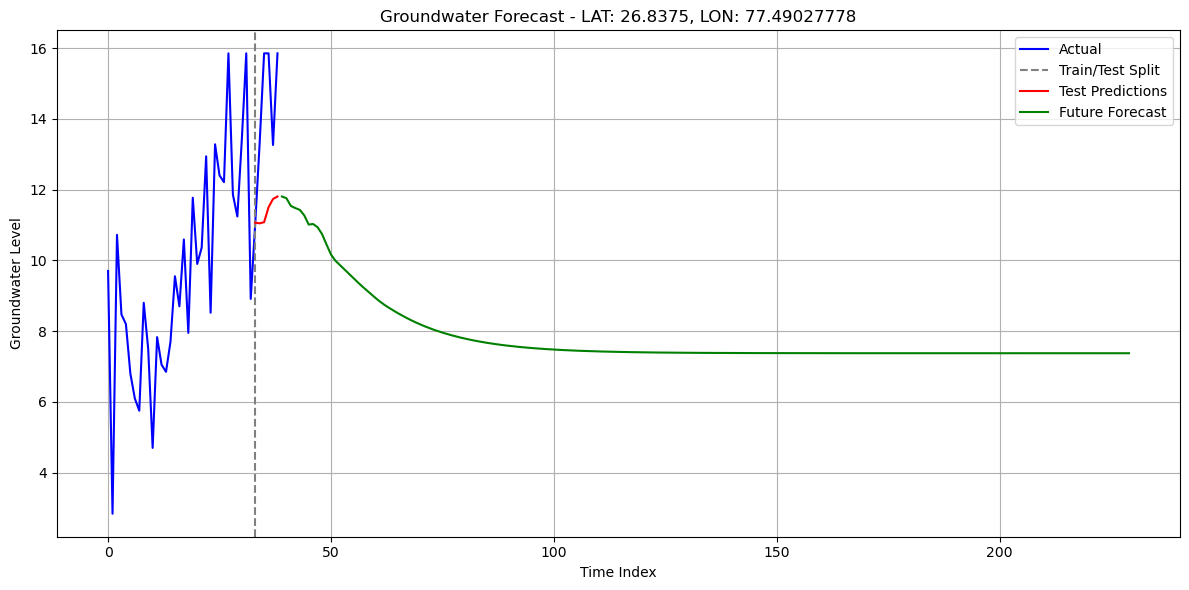

📅 Forecasted Yearly Average Groundwater Levels at LAT 26.8375, LON 77.49027778:

2017: 11.22
2018: 9.46
2019: 8.36
2020: 7.82
2021: 7.57
2022: 7.46
2023: 7.41
2024: 7.39
2025: 7.38
2026: 7.38
2027: 7.38
2028: 7.38
2029: 7.38
2030: 7.37
2031: 7.37
2032: 7.37

✅ Model saved as model.h5
✅ Scaler saved as scaler.pkl


In [11]:
def train_cnn_lstm_predict(data, lat, lon, future_steps=4, window_size=12, epochs=20, plot_results=True):
    group = data[
        (data['LAT'] == lat) &
        (data['LON'] == lon) &
        (data['GROUNDWATER'].notna()) &
        (data['GROUNDWATER'] != 0)
    ].sort_values(by='TIME')

    if group.empty:
        print(f"No valid groundwater data for LAT: {lat}, LON: {lon}. Skipping...")
        return None

    y = group['GROUNDWATER'].interpolate(method='linear').values.reshape(-1, 1)

    if len(y) < window_size:
        print(f"Not enough data after filtering for LAT: {lat}, LON: {lon}. Skipping...")
        return None

    scaler = MinMaxScaler()
    y_scaled = scaler.fit_transform(y)

    X_seq, y_seq = [], []
    for i in range(len(y_scaled) - window_size):
        X_seq.append(y_scaled[i: i + window_size])
        y_seq.append(y_scaled[i + window_size])

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    if len(X_seq) == 0:
        print(f"Not enough sequences for training. Skipping...")
        return None

    X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

    # Split train/test
    split_index = int(len(X_seq) * 0.8)
    X_train, y_train = X_seq[:split_index], y_seq[:split_index]
    X_test, y_test = X_seq[split_index:], y_seq[split_index:]

    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)),
        MaxPooling1D(pool_size=2),
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=epochs, verbose=1)

    predictions_test_inv = None
    y_test_inv = None
    if len(X_test) > 0:
        predictions_test = model.predict(X_test)
        predictions_test_inv = scaler.inverse_transform(predictions_test)
        y_test_inv = scaler.inverse_transform(y_test)

    future_predictions_scaled = []
    future_input = X_seq[-1]  # last window

    for _ in range(future_steps):
        pred_scaled = model.predict(future_input.reshape(1, window_size, 1))[0]
        future_predictions_scaled.append(pred_scaled[0])
        future_input = np.append(future_input[1:], pred_scaled).reshape(window_size, 1)

    future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

    if plot_results and predictions_test_inv is not None:
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y)), y, label='Actual', color='blue')
        plt.axvline(split_index + window_size, color='gray', linestyle='--', label='Train/Test Split')

        test_indices = range(split_index + window_size, split_index + window_size + len(predictions_test_inv))
        plt.plot(test_indices, predictions_test_inv, label='Test Predictions', color='red')

        future_indices = range(len(y), len(y) + future_steps)
        plt.plot(future_indices, future_predictions, label='Future Forecast', color='green')

        plt.title(f"Groundwater Forecast - LAT: {lat}, LON: {lon}")
        plt.xlabel("Time Index")
        plt.ylabel("Groundwater Level")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return {
        'model': model,
        'scaler': scaler,
        'predictions_test': predictions_test_inv,
        'y_test': y_test_inv,
        'future_predictions': future_predictions
    }


# Run the prediction
from datetime import datetime
import pandas as pd

if __name__ == "__main__":
    sheet_id = "1BMnTYsvII1jzBizVSt2nohdsaW0h2Eq5wAuCurTkp3M"
    data = load_data_from_gsheet(sheet_id)

    lat = float(input("Enter the latitude: "))
    lon = float(input("Enter the longitude: "))
    target_year = int(input("Enter the future year to forecast up to (e.g., 2028): "))

    # Get the last available date
    group = data[(data['LAT'] == lat) & (data['LON'] == lon)].sort_values(by='TIME')
    last_date = pd.to_datetime(group['TIME'].dropna().max())
    if pd.isnull(last_date):
        last_date = pd.to_datetime("2000-01-01")  # fallback

    # Calculate future_steps = months from last_date + 1 to Dec of target_year
    end_date = pd.to_datetime(f"{target_year}-12-01")
    future_steps = (end_date.year - last_date.year) * 12 + (end_date.month - last_date.month)

    if future_steps <= 0:
        print("⚠️ The target year must be after the last available data point.")
        exit()

    print(f"\n🗓 Forecasting from {last_date.strftime('%Y-%m')} to {end_date.strftime('%Y-%m')} ({future_steps} months)...\n")

    results = train_lstm_predict(data, lat, lon, future_steps=future_steps)

    if results and results['future_predictions'] is not None:
        forecast = results['future_predictions'].flatten()

        # Create future date range
        future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=len(forecast), freq='MS')

        forecast_df = pd.DataFrame({
            'Date': future_dates,
            'Forecast': forecast
        })
        forecast_df['Year'] = forecast_df['Date'].dt.year

        print(f"📅 Forecasted Yearly Average Groundwater Levels at LAT {lat}, LON {lon}:\n")
        for year in sorted(forecast_df['Year'].unique()):
            yearly_vals = forecast_df[forecast_df['Year'] == year]['Forecast']
            print(f"{year}: {yearly_vals.mean():.2f}")

        # ✅ Save model and scaler
        results['model'].save("model.h5")
        joblib.dump(results['scaler'], 'scaler.pkl')
        print("\n✅ Model saved as model.h5")
        print("✅ Scaler saved as scaler.pkl")
